# Generating neurons with MCMC algorithm
This script presents the method of generating neuron using naive base Markov Chain Monte Carlo. The method can be summerize in two steps:
- Reading the database and extracing the fetur
- using MCMC to generate the neuron


## Imports

In [1]:
import numpy as np
import McNeuron
import matplotlib.pyplot as plt
from copy import deepcopy
from numpy.linalg import inv
from collections import Counter
import pickle
%matplotlib inline

# Load data

In [2]:
path = "/Volumes/Arch/Dropbox/HG-GAN/03-Data/All Data/"
data = McNeuron.NeuronCollection.load_data(path)

In [21]:
data['Y'].keys()

['Date of Upload',
 'Total Length',
 'Number of Bifurcations',
 'Average Bifurcation Angle Local',
 'Morphological Attributes',
 'Primary Brain Region',
 'Slice Thickness',
 'Magnification',
 'NeuroMorpho.Org ID',
 'Fractal Dimension',
 'Primary Cell Class',
 'Number of Stems',
 'Number of Branches',
 'Min Age',
 'Experiment Protocol',
 'Total Surface',
 'Development',
 'Max Branch Order',
 'Max Euclidean Distance',
 'Partition Asymmetry',
 'Tertiary Cell Class',
 'Secondary Brain Region',
 'Age Scale',
 'Min Weight',
 'Physical Integrity',
 'Overall Depth',
 'Max Weight',
 'Max Age',
 'Original Format',
 'Tissue Shrinkage',
 "Average Rall's Ratio",
 'Structural Domains',
 'Gender',
 'Overall Height',
 'Experimental Condition',
 'Date of Deposition',
 'Average Bifurcation Angle Remote',
 'Slicing Direction',
 'Total Fragmentation',
 'Description on swc file',
 'Secondary Cell Class',
 'Staining Method',
 'Species Name',
 'Average Diameter',
 'Soma Surface',
 'Reconstruction Method',
 '

## number of neurons for each cell class

In [25]:
label = 'Secondary Cell Class'
label = 'Archive Name'
for key, value in sorted(Counter(data['Y'][label]).iteritems(), 
                         key=lambda (k,v): (v,k)):
    print "%s: %s" % (key, value)

Bleckert: 1
Coombes: 1
De Schutter: 1
Hirsch: 1
Hirsch,DIADEM: 1
Landgraf: 1
Ma: 1
Mallick: 1
Palmer: 1
Spiga: 1
Turner,Ascoli,Wittner,Buzsaki: 1
Weigel: 1
White: 1
Ascoli,Barrionuevo,DIADEM: 2
Barbour: 2
Gerber: 2
Heistek_Mansvelder: 2
Maccaferri: 2
Martin: 2
Portera-Cailliau: 2
Prince: 2
Sikdar: 2
Turner,Ascoli,Buzsaki: 2
Baro: 3
Bergstrom: 3
DIADEM,Ascoli,Sugihara: 3
Halnes: 3
Ito: 3
Katona: 3
Klausberger: 3
Merchan-Perez: 3
Poorthuis: 3
Sun_Prince: 3
Vlachos: 3
Calabresi: 4
Hay,Markram: 4
Jefferis,DIADEM: 4
Kondo: 4
Kubota: 4
Buzsaki: 5
Chandrashekar: 5
Destexhe: 5
Rhode: 5
Alvarez: 6
Anton: 6
Ascoli,Zaborszky: 6
Burke: 6
Capogna: 6
Drago: 6
Dusart: 6
Faucherre: 6
Flores: 6
Henny: 6
Jonas,Bartos: 6
Larkman: 6
Lee_CH: 6
Monyer: 6
Otsuka: 6
Zaitsev: 6
Baldwin: 7
Cohen,Mizrahi: 7
Papazian: 7
Petrosini: 7
Povysheva: 7
Schmitz: 7
Strettoi: 7
Barrionuevo: 8
Blackman,Sjostrom: 8
Vervaeke: 8
Duque-Tahvildari: 9
Santhakumar: 9
Ascoli,Barrionuevo: 10
Cauli: 10
DeMunter: 10
Esclapez: 10
Hoffm

In [26]:
name = "stellate"
subdata = McNeuron.NeuronCollection.make_sub_data(data, 
                                                  'Secondary Cell Class', 
                                                  name)
subdata['X'] = subdata['X'][:100]
for n in subdata['Y'].keys():
    subdata['Y'][n] = subdata['Y'][n][:100]
pickle.dump(subdata, open( name + ".p", "wb" ) )

name = 'tripolar'
subdata = McNeuron.NeuronCollection.make_sub_data(data, 
                                                  'Secondary Cell Class', 
                                                  name)
pickle.dump(subdata, open( name + ".p", "wb" ) )

name = "Purkinje"
subdata = McNeuron.NeuronCollection.make_sub_data(data, 
                                                  'Secondary Cell Class', 
                                                  name)
pickle.dump(subdata, open( name + ".p", "wb" ) )
name = "pyramidal"
subdata = McNeuron.NeuronCollection.make_sub_data(data, 
                                                  'Archive Name', 
                                                  'Chen')
pickle.dump(subdata, open( name + ".p", "wb" ) )

In [ ]:
n = McNeuron.Neuron(input_file=data['X'][index[0]])
McNeuron.visualize.plot_2D(n)

In [ ]:
plt.hist(n.features['branch angle'])

### Get a subset of data

In [ ]:
label = 'Archive Name'
name = 'Chen'
label = 'Primary Brain Region'
name = 'neocortex'
sub_data = McNeuron.NeuronCollection.make_sub_data(data, label, name)
Counter(sub_data['Y']['Primary Cell Class'])

In [ ]:
label = 'Secondary Cell Class'
name = 'Oligodendrocyte'
sub_data = McNeuron.NeuronCollection.make_sub_data(sub_data, label, name)
len(sub_data['X'])

In [ ]:
for  i in data['Y'].keys():
    print i
    print data['Y'][i][1]

### A sample of sub data

In [ ]:
n = McNeuron.Neuron(input_file=sub_data['X'][4], input_format="Matrix of swc")
McNeuron.visualize.plot_2D(n)
n.fit()

In [ ]:
m = McNeuron.subsample.fast_straigthen_subsample_swc(data['X'][44], 20)
n = McNeuron.Neuron(input_format='Matrix of swc without Node class', input_file=m)
McNeuron.visualize.plot_2D(n)

In [ ]:
n = McNeuron.Neuron(input_format='Matrix of swc without Node class', input_file=data['X'][0])
plt.plot(n.features['continue depth'])
n.features.keys()

# Making Database

In [28]:
hist_features = {
    'branch angle': np.arange(0,np.pi,np.pi/20),
    'segmental branch angle' : np.arange(0,np.pi,np.pi/20),
    'side branch angle': np.arange(0,np.pi,np.pi/20),
    'global angle': np.arange(0,np.pi,np.pi/20),
    'local angle': np.arange(0,np.pi,np.pi/20),
    'curvature' : np.arange(0,np.pi,np.pi/20),
    'distance from root' : np.arange(0,60,5),
    'neuronal/euclidean for segments' : np.arange(1, 3, .1),
    'neuronal/euclidean' : np.arange(1, 3, .1),
    }
value_features = {
    'Nnodes',
    'Nbranch',
    #'Nsoma',
    'initial segments',
    'Npassnode',
    'mean neuronal/euclidean',
    'mean segmental neuronal/euclidean',
    'mean segmental neural length',
    #'branch branch',
    #'branch die',
    #'die die'
    #'mean segmental euclidean length',
}
vec_value = {
    'pictural image xy',
    #'pictural image xyz',
    'pictural image xy tips',
    'discrepancy space',
    'self avoidance',
    #'branch depth',
    #'continue depth',
    #'dead depth'
    #'diameter euclidean (bins)'
}
# c = McNeuron.NeuronCollection.Collection(input_format='swc', 
#                                           input_file=L_neuron[1830:1836])
c = McNeuron.NeuronCollection.Collection()
c.set_subsampling_length(.2)
c.fit(input_format='Matrix of swc without Node class', 
      input_file=subdata['X']) #data['X'])
c.set_features()
c.hist_features = hist_features
c.vec_value = vec_value
c.set_value(list_features=value_features)
c.set_hist(list_features = hist_features,
           hist_range=hist_features)
c.set_vec_value(vec_value)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


### Show database

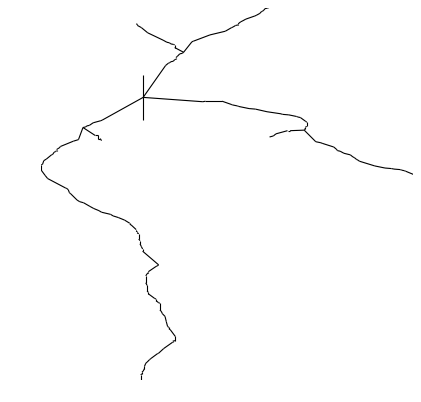

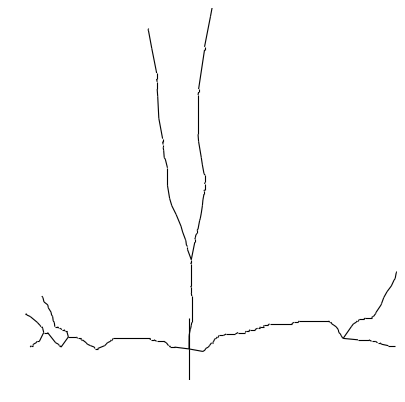

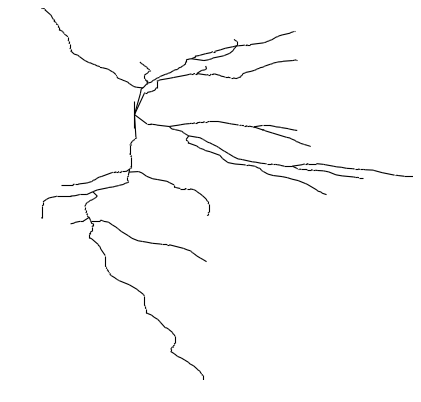

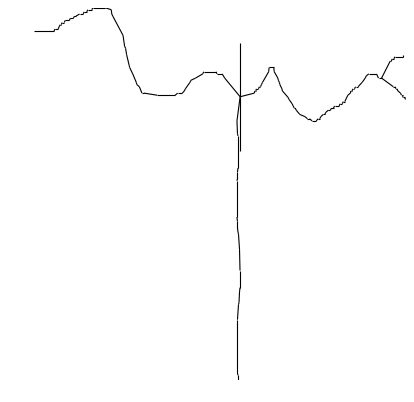

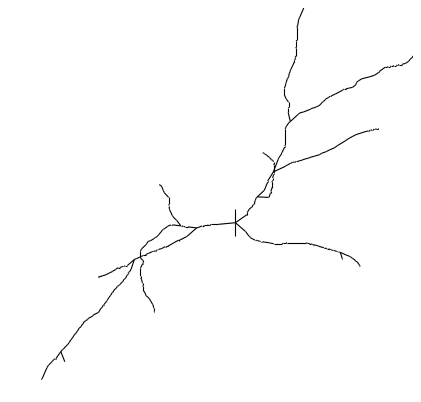

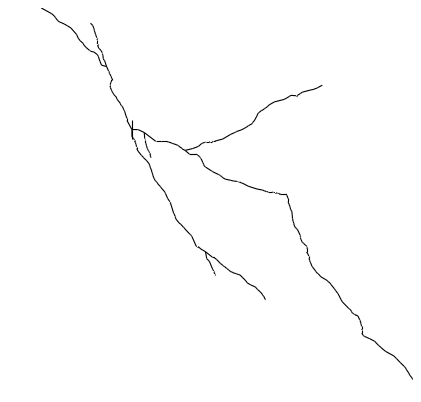

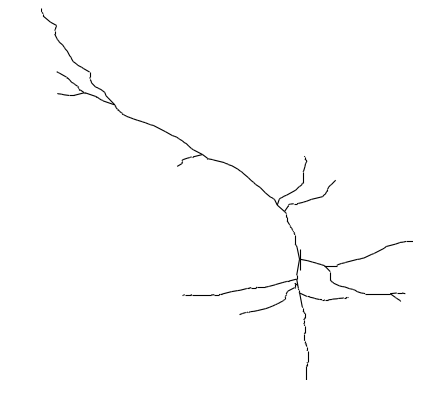

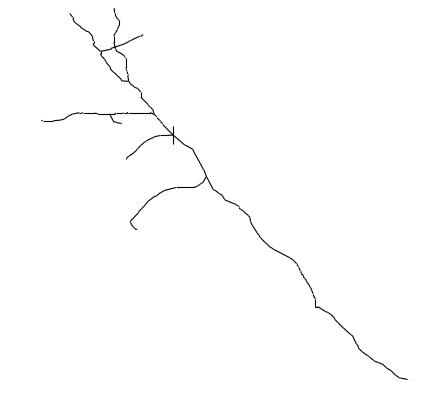

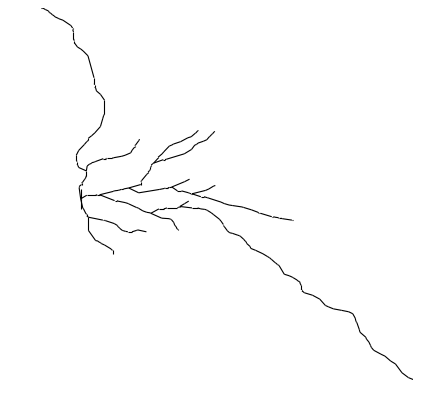

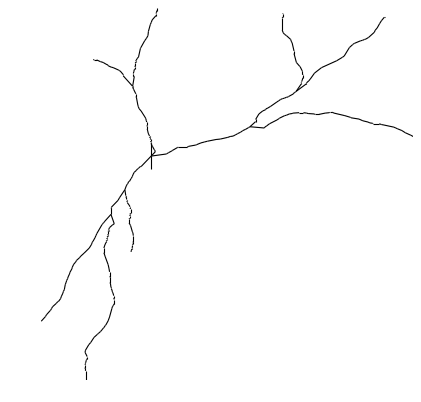

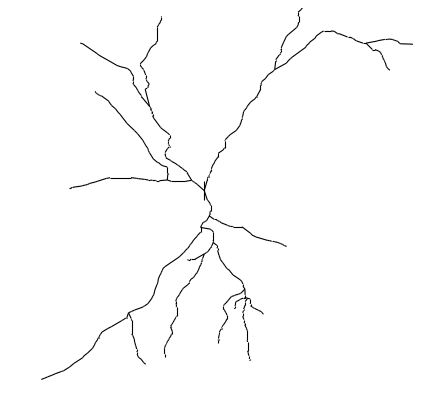

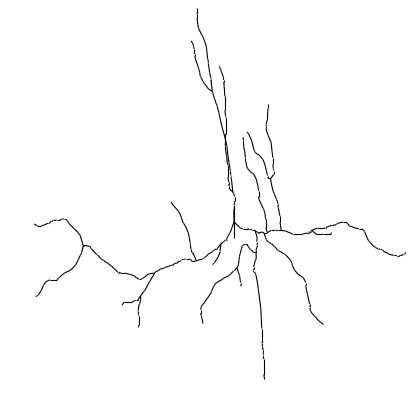

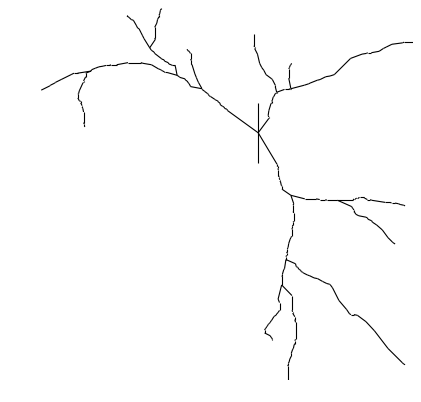

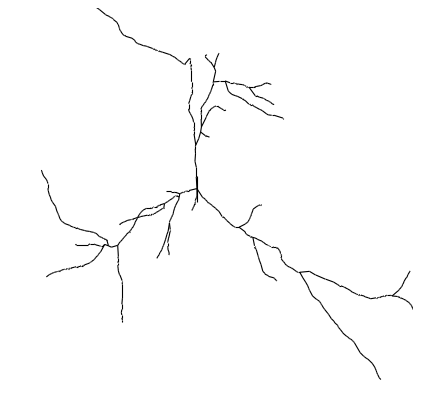

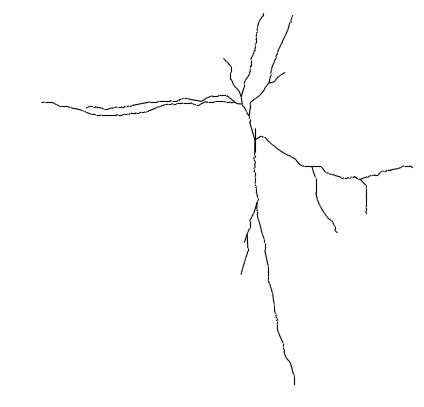

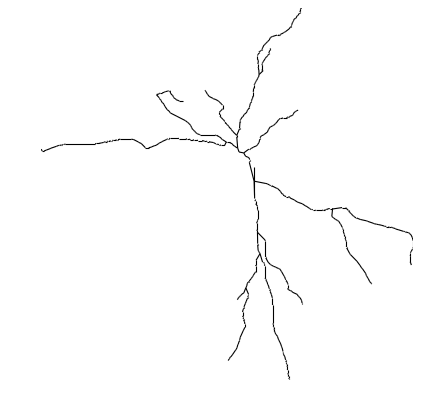

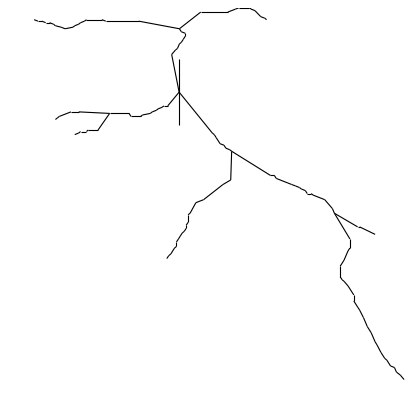

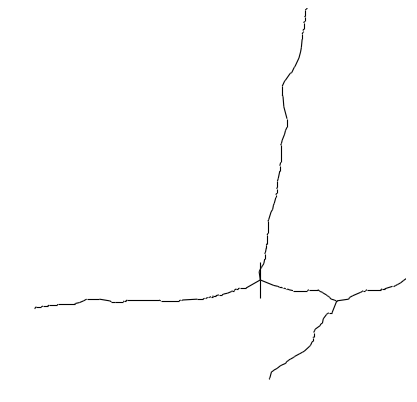

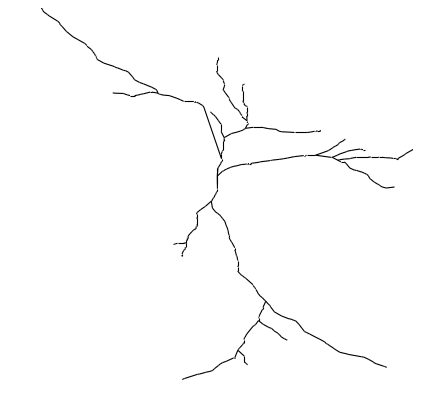

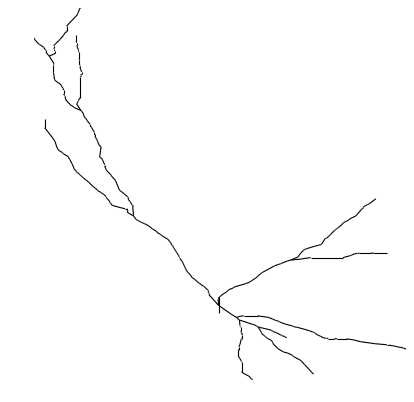

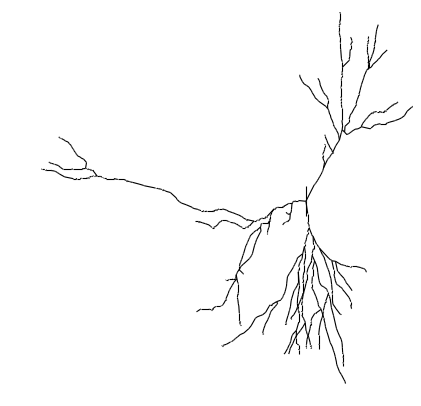

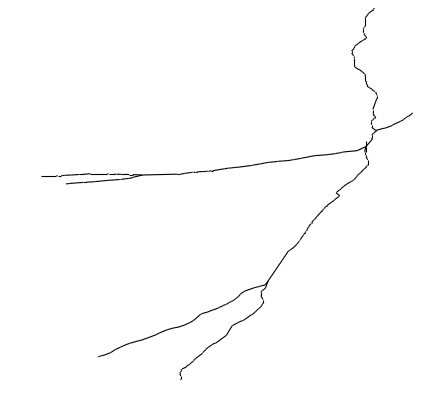

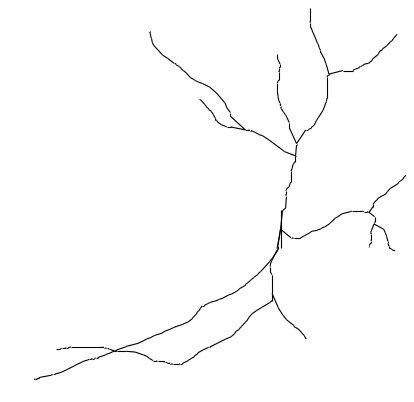

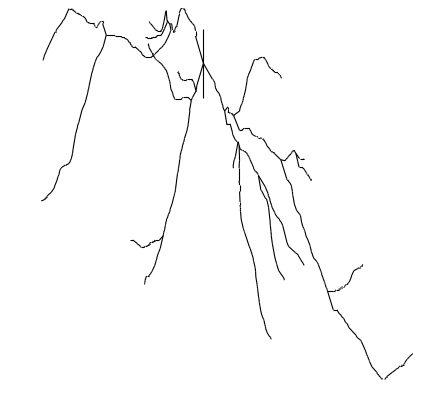

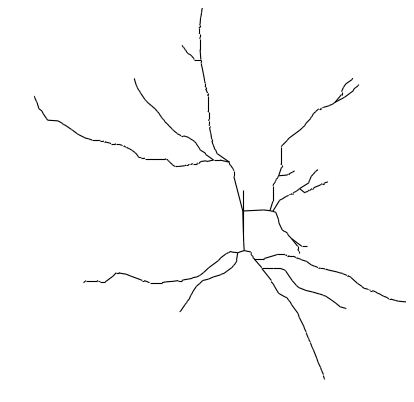

Nbranch
9.32
6.92080920124


initial segments
5.12
0.324961536185


mean segmental neural length
24.5325485337
8.57801369423


mean neuronal/euclidean
0.200181687459
0.0819817981447


Npassnode
465.64
232.803587601


Nnodes
487.4
245.221369379


mean segmental neuronal/euclidean
0.152358587685
0.0627958234765


neuronal/euclidean for segments


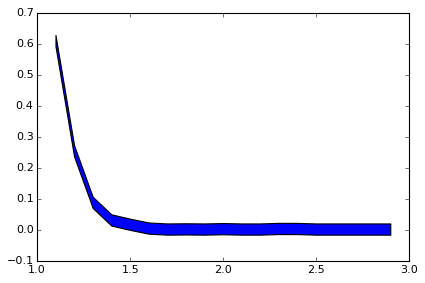

global angle


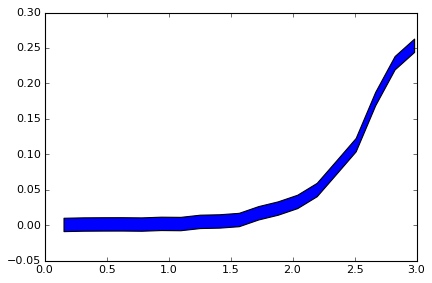

neuronal/euclidean


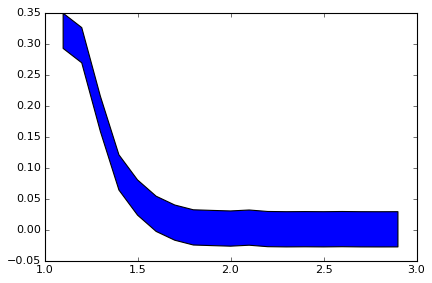

distance from root


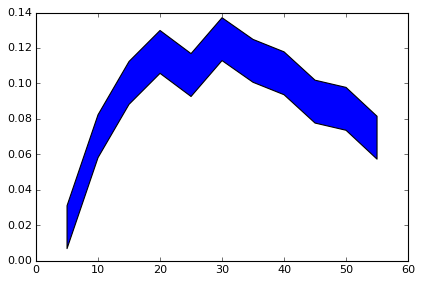

segmental branch angle


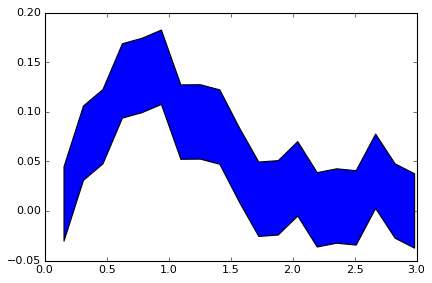

local angle


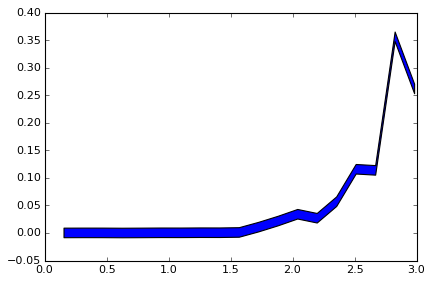

branch angle


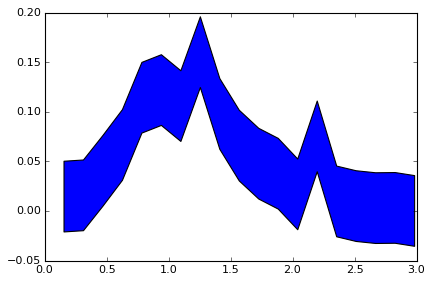

curvature


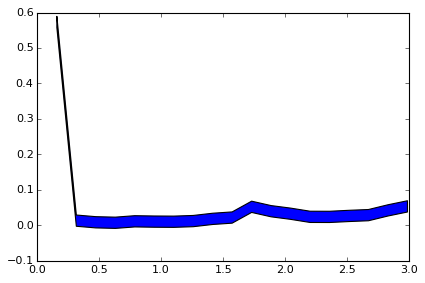

side branch angle


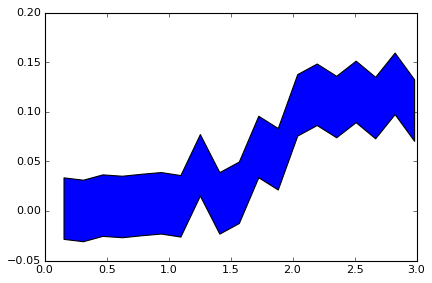

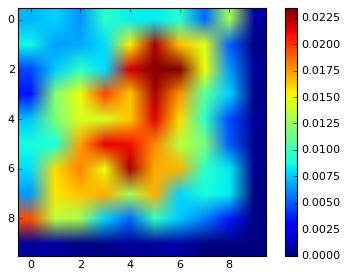

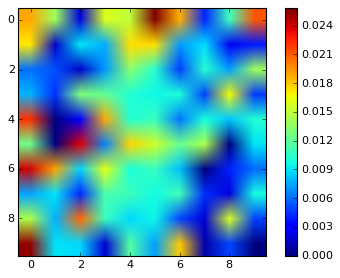

pictural image xy tips


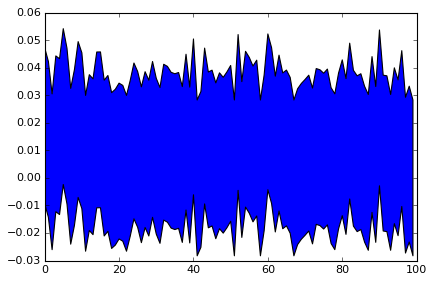

discrepancy space


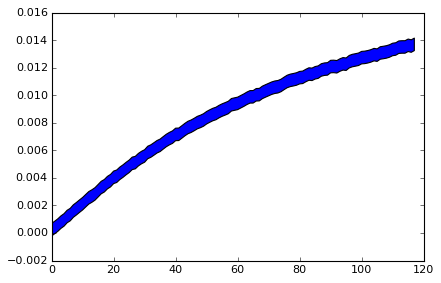

self avoidance


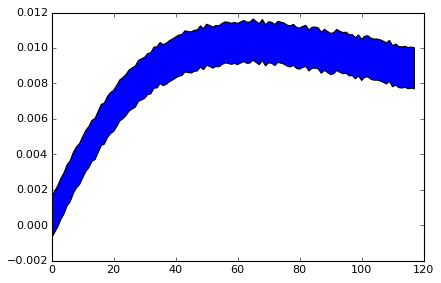

pictural image xy


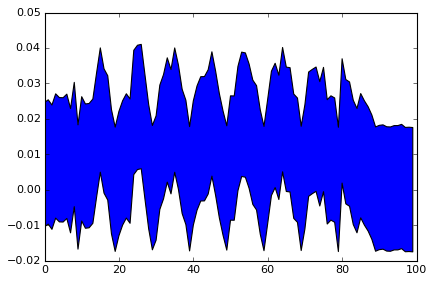

In [16]:
McNeuron.visualize.show_database(c)

In [ ]:
McNeuron.visualize.plot_2D(c.database[12], save="tripolar3.eps")

In [ ]:
McNeuron.visualize.plot_2D(c.database[1])

In [ ]:
a = c.database[8].n_node
A = np.zeros([a,a])
A[np.arange(a), c.database[8].parent_index] = 1
A[0,0] = 0

In [ ]:
plt.imshow(1- np.linalg.inv(np.eye(a)-A))

In [ ]:
np.linalg.eig(np.eye(a)+A)

In [ ]:
c.matrix_feature().shape

In [ ]:
import numpy, scipy.io
scipy.io.savemat('jalal.mat', mdict={'whatever_data': c.matrix_feature()})

In [ ]:
plt.hist(np.reshape(c.matrix_feature(),(1, 99*831)))

In [ ]:
McNeuron.visualize.plot_dendrogram(c.database[10])

In [ ]:
plt.plot(c.mean_vec_value['continue depth'])

In [ ]:
a = c.database[0].parent_index + 1
a[0] = 0
McNeuron.visualize.plot_dendrogram(a[:5])
#McNeuron.visualize.plot_dendrogram(c.database[0].parent_index)

## Normlizer

In [ ]:
normlizer = c.normlizor(3)
normlizer['pictural image xy'] *=1.65
normlizer['pictural image xy tips'] *=1.45
normlizer['mean neuronal/euclidean'] *=1
normlizer['Nbranch'] *=.3
#normlizer['ratio_diameter_euclidean'] *=.3
normlizer['self avoidance'] *=2
normlizer['local angle'] *=1.2
normlizer['branch angle'] *=1
normlizer['mean segmental neuronal/euclidean'] *=.8
normlizer['mean segmental neural length'] *=.05
normlizer['discrepancy space'] *=2
normlizer['side branch angle'] *=.5

In [ ]:
for name in c.std_hist.keys():
    c.std_hist[name] = 1.
for name in c.std_value.keys():
    c.std_value[name] = 1.
for name in c.std_vec_value.keys():
    c.std_vec_value[name] = 1.
c.std_hist

In [ ]:
normlizer = c.normlizor(10)

In [ ]:
perneron = deepcopy(per.evo[-1])

## MCMC on database

In [ ]:
wing_number = int(np.floor(c.mean_value['initial segments']))
nnode = np.array([])
for n in c.database:
    nnode = np.append(nnode, n.n_node)
node_on_each_wings = int(np.floor(nnode.mean()/wing_number))

nnode = np.array([])
for n in c.database:
    nnode = np.append(nnode, n.n_node)
nnode.mean()

mean_len = 10
in_neuron = \
    McNeuron.neuron_util.star_neuron(wing_number=wing_number,
                                     spherical=None,
                                     node_on_each_wings=node_on_each_wings,
                                     length=mean_len)
in_neuron = c.database[0]
#in_neuron = deepcopy(perneron)
per = McNeuron.MCMC(neuron=in_neuron, 
                    iterations=1, 
                    verbose=0)

per.set_mean_var_length(mean=mean_len, var=mean_len/3)

per.hist_features=hist_features
per.value_features=value_features
per.vec_value=vec_value
per.set_verbose(0)
per.set_trend()
L = {'extension/reduction': 0,
     'extension/reduction end points': 0,
     #'add/remove' : 0.,
     #'rescale toward end' : 0,
     #'diameter' : 0.,
    
     'diameter_toward' : 0. ,

     'rotation for any node' : 3.,
     'rotation for branching' : 4.,
     #'location toward end' : 0.,
     #'location' : .1,
     #'location for important point' : .0,
    
     'sliding general' : .5,
     'sliding certain in distance' : 1.,
     'sliding for branching node' : .5,
     'sliding for branching node certain distance' : 1.,
     'sliding for end nodes': 2.
     #'stretching vertical' : .0,
     #'stretching horizental' : .0
}
per.kappa_rotation = 400.
per.rescale_value = 0
per.sliding_limit = 10*mean_len
per.horizental_stretch = .1
per.vertical_stretch = .1
per.location_toward_cte = .5
per.location_important = 5.
per.set_database(c)
per.set_feature_normalizer(normlizer)
per.set_probability(L)
per.fit()
gen = per.neuron
McNeuron.visualize.plot_2D(gen,dpi = 120, line_width=1,size_x = 6);
per.show_MCMC(1,14,6)
#McNeuron.neuron_util.check_neuron(per.neuron)
#per.neuron.show_features()

In [ ]:
S = np.zeros([80])
for i in range(80):
    S[i] = per.distance(c.database[i])[0]
print S.mean()
print S.std()

## Start from the current neuron

In [ ]:
per.neuron = per.evo[-1]
per.set_n_iteration(10)
per.set_verbose(3)
#per.set_feature_normalizer(normlizer)
#per.set_probability(L)
per.fit()
McNeuron.visualize.plot_2D(per.neuron, line_width=2);
per.show_MCMC(200,14,6)
#per.neuron.show_features()

In [ ]:
per.set_n_iteration(200)
per.set_verbose(0)
per.fit()
McNeuron.visualize.plot_2D(per.neuron, dpi = 120, line_width=1)
per.show_MCMC(100,14,6)
#per.neuron.show_features()

In [ ]:
McNeuron.visualize.plot_2D(per.neuron, save="gen1.eps")

In [ ]:
McNeuron.visualize.plot_dendrogram(per.neuron)

In [ ]:
import scipy
a = scipy.io.loadmat("pine.mat")
n = a["BPar"][:300,0]
McNeuron.visualize.plot_dendrogram(n)

In [ ]:
per.set_n_iteration(2000)
per.set_verbose(0)
per.fit()
McNeuron.visualize.plot_2D(per.neuron, dpi = 120, line_width=1)
per.show_MCMC(100,14,6)
#per.neuron.show_features()

In [ ]:
from matplotlib import collections  as mc
def get_segment_collection(per):
    lines = []

    for raw in range(1):
        for col in range(1):
            #neuron = per.evo[2*raw+16*col]
            #neuron = per.database[raw+3*col]
            neuron = per
            p = neuron.location[0:2, :]
            p = p/(1*p.max())
            translation=(raw, 1-col)

            for i in range(len(neuron.nodes_list)):
                j = neuron.parent_index[i]
                lines.append([(p[0,i] + translation[0],p[1,i] + translation[1]),
                              (p[0,j] + translation[0],p[1,j] + translation[1])])
    lc = mc.LineCollection(lines, color = 'k')
    return lc

In [ ]:
plt.plot(per.neuron.location[2,:])

In [ ]:
len(per.evo)

In [ ]:
lc = get_segment_collection(c)
fig, ax = plt.subplots()
ax.add_collection(lc)
plt.axis('off')
plt.xlim((-1,4))
plt.ylim((-1, 4))
#plt.draw()
plt.show()
fig.savefig("real.eps", format = "eps")

In [ ]:
c = McNeuron.Neuron(input_file=sub_data['X'][33], input_format="Matrix of swc")
lc = get_segment_collection(c)
fig, ax = plt.subplots()
ax.add_collection(lc)
plt.axis('off')
plt.xlim((-2,2))
plt.ylim((-2,2))
#plt.draw()
plt.show()
#fig.savefig("Bikson.eps", format = "eps")

## Evolution

In [ ]:
McNeuron.visualize.plot_evolution_mcmc(per)

## Save MCMC

In [ ]:
pickle.dump( per, open( "per5.p", "wb" ) )

In [ ]:
per.trend.shape

In [ ]:
200*128

In [ ]:
plt.plot(sum(per.trend[:,0:],0))
#plt.savefig("plt_sample.eps", format = "eps")

In [ ]:
plt.plot(np.transpose(per.trend[:,0:]));
plt.legend(per.list_features,bbox_to_anchor=(2.1,1.1))
#plt.savefig("each_sample.eps", format = "eps")

In [ ]:
plt.plot(np.transpose(per.trend_normal[:,2000:]));
plt.legend(per.list_features,bbox_to_anchor=(2.1,1.1))
plt.savefig("normal_sample.eps", format = "eps")